I'm going to make visualizations of my data in order to find some correlations between Biopsy and other features.

In [13]:
categorical = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV']

In [14]:
continuous = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)','STDs (number)']

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1=pd.read_csv('risk_factors_cervical_cancer_cleaned.csv')

Using scatterplot to see if there any relation between Age and Biopsy

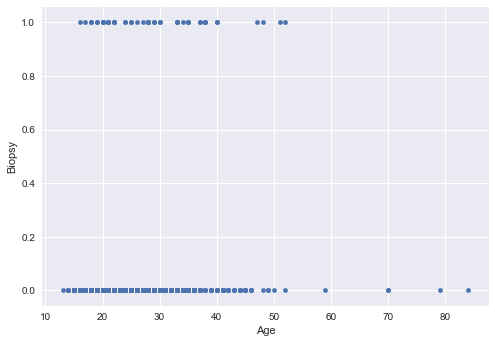

In [27]:
df1.plot(kind='scatter', x='Age', y='Biopsy')
plt.show()

Doing scatterplots for other columns to see if there any correlation with Biopsy 

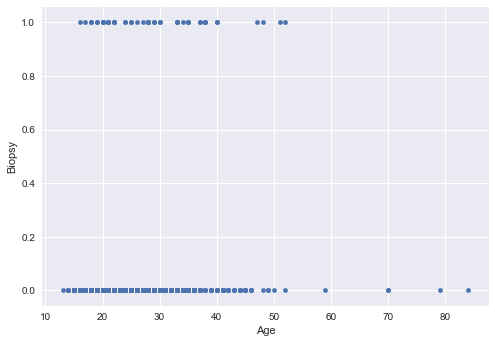

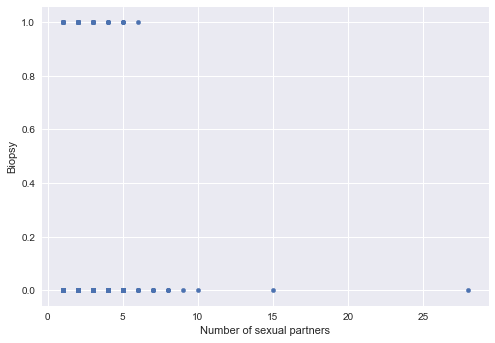

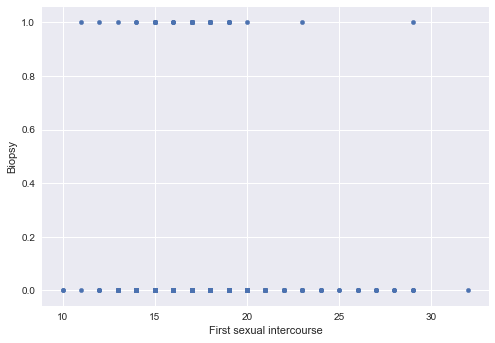

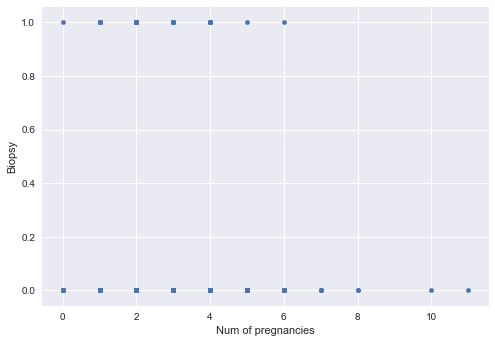

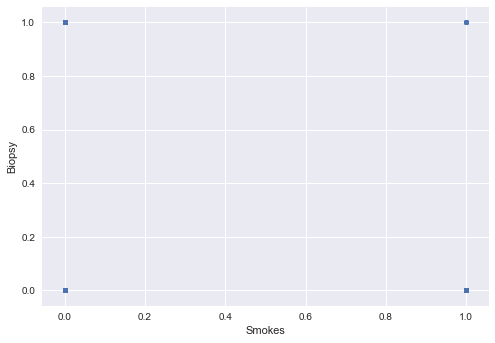

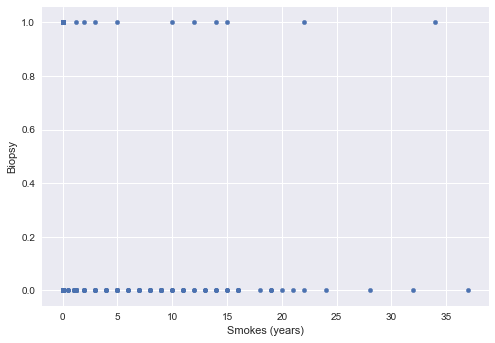

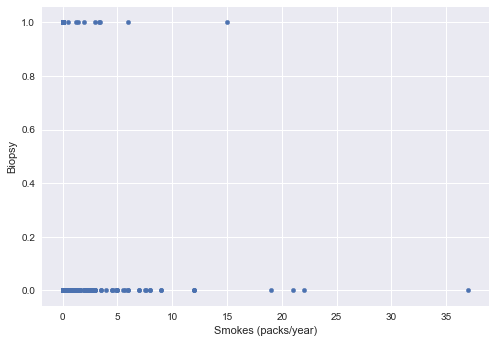

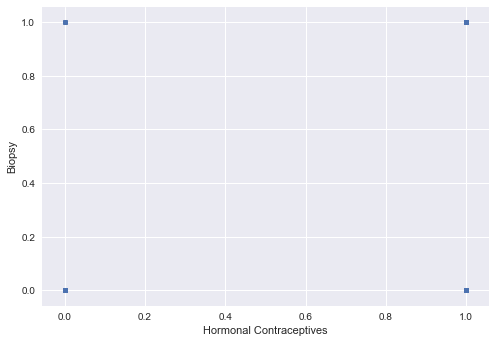

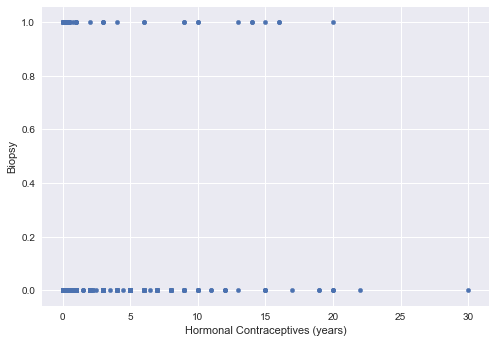

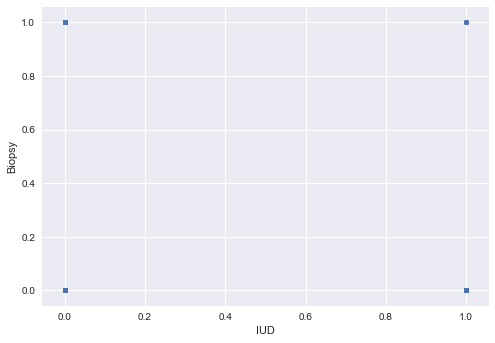

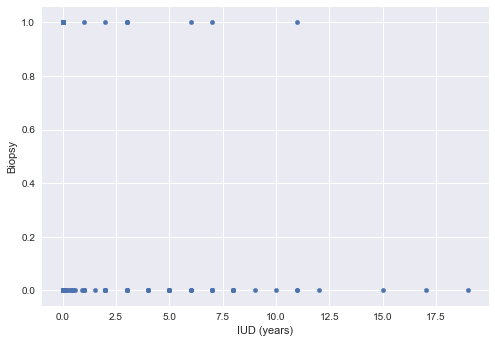

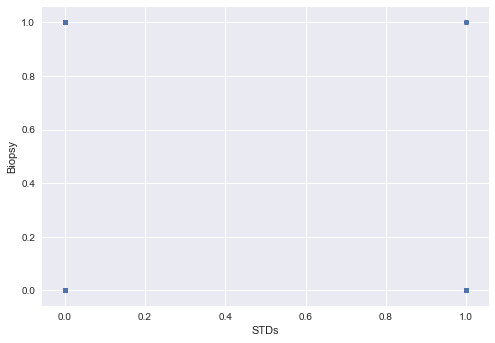

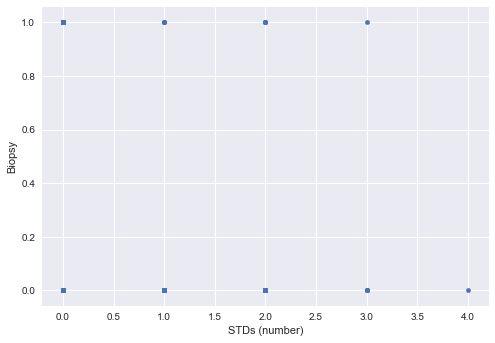

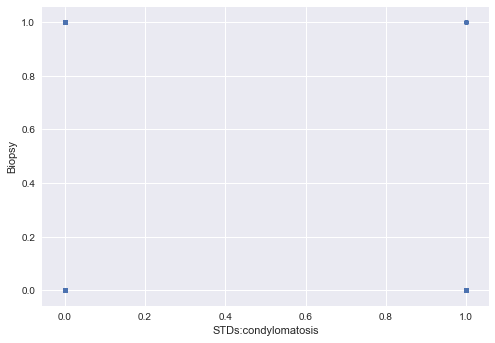

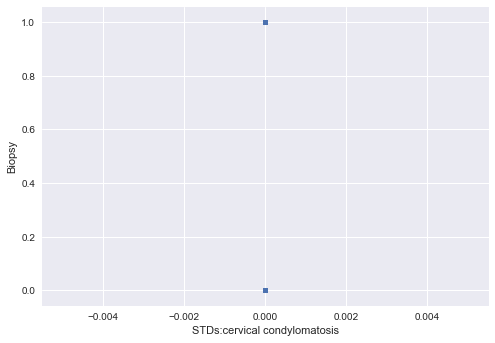

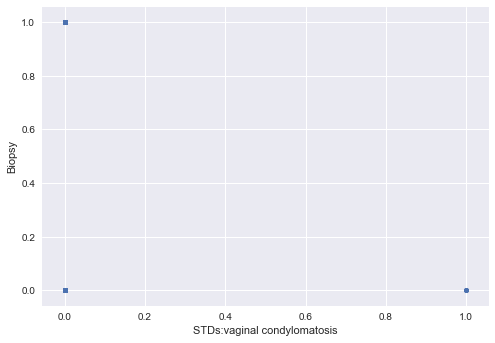

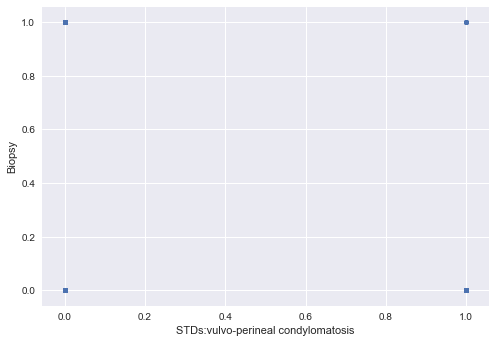

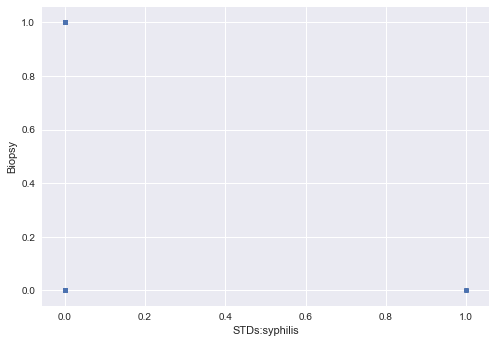

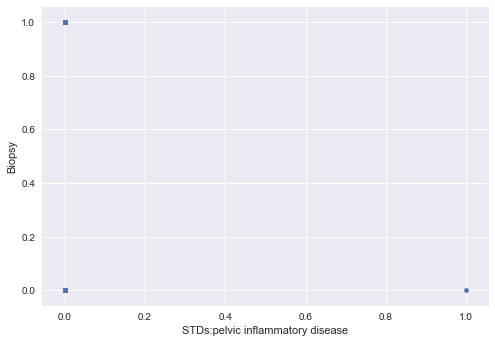

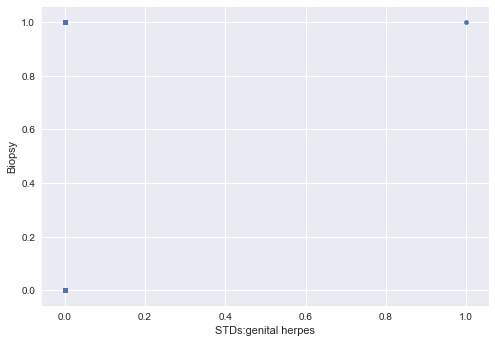

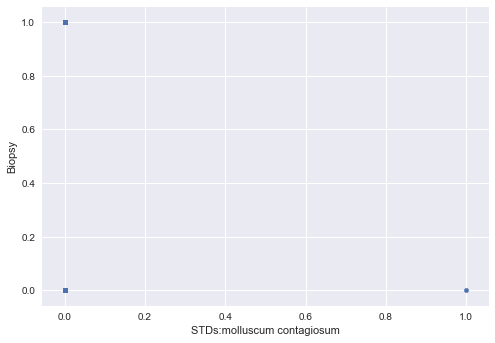

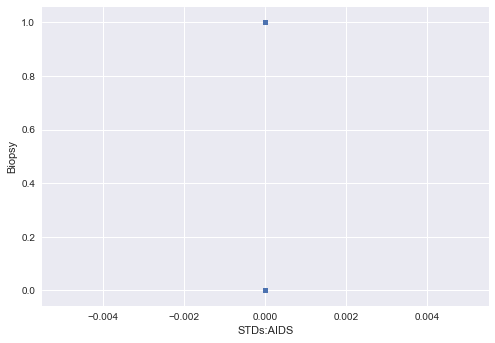

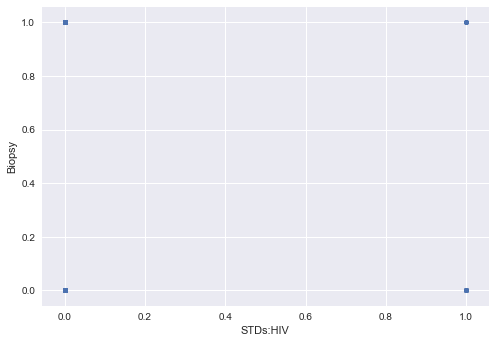

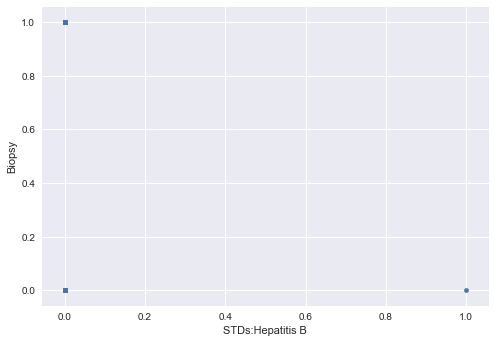

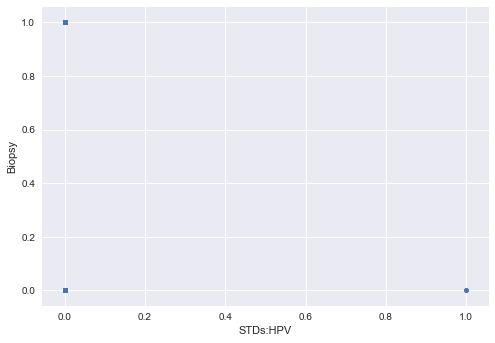

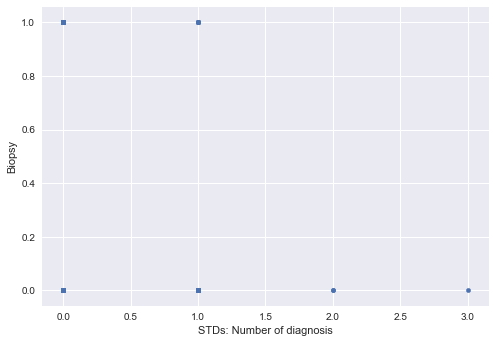

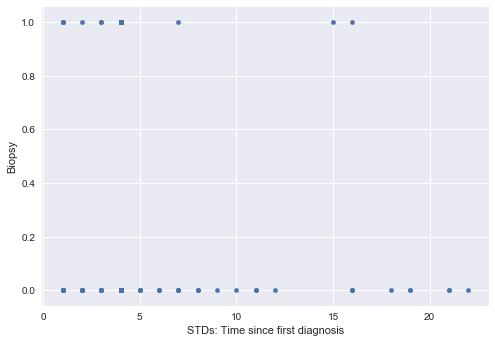

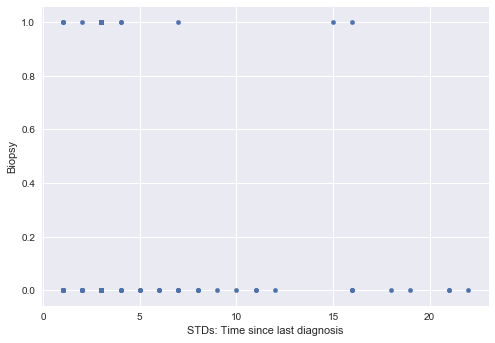

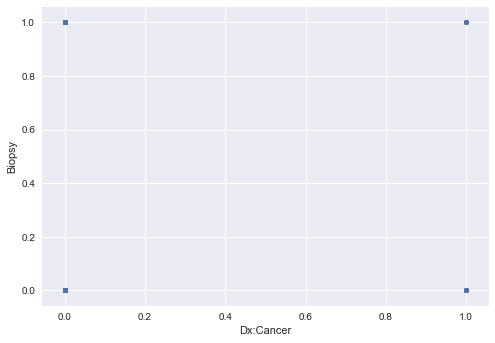

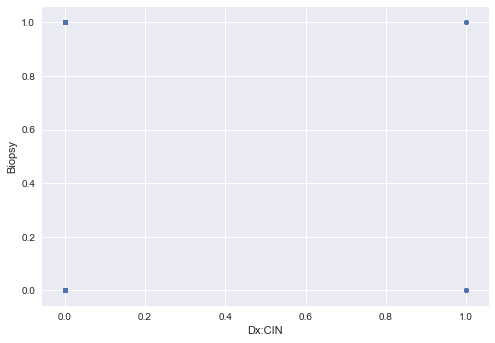

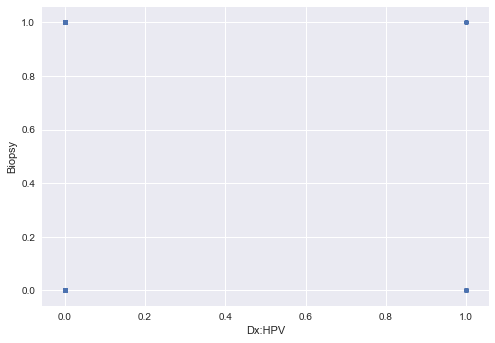

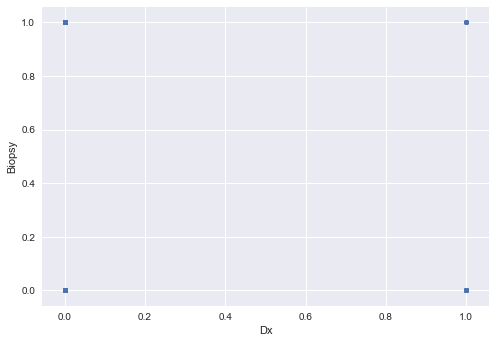

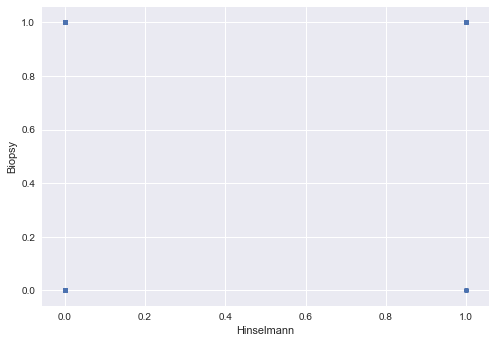

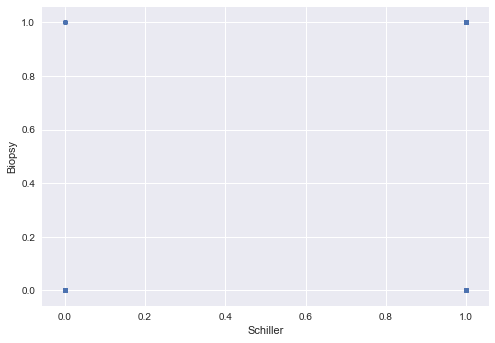

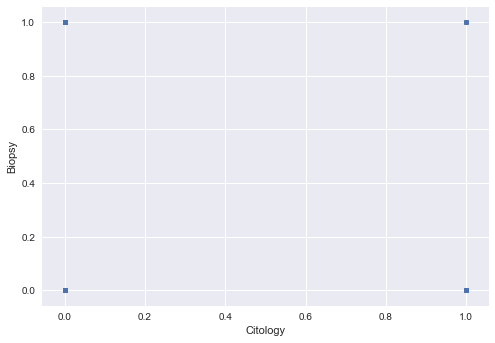

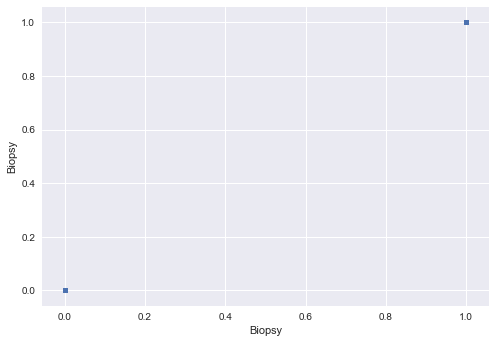

In [17]:
for col in df1.columns[1:]:
    df1.plot(kind='scatter', x=col, y='Biopsy',subplots=True)
    plt.show()

Using seaborn jointplot to visualize scatterplots better, so we can see the density of the scattered spots clearly and also to see the correlation coefficients.

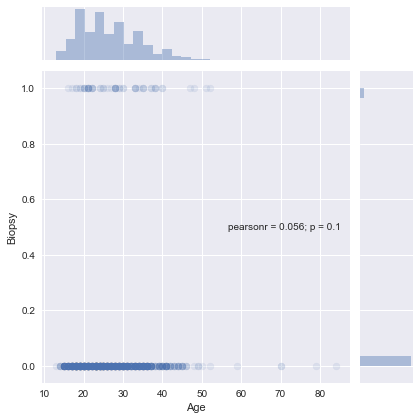

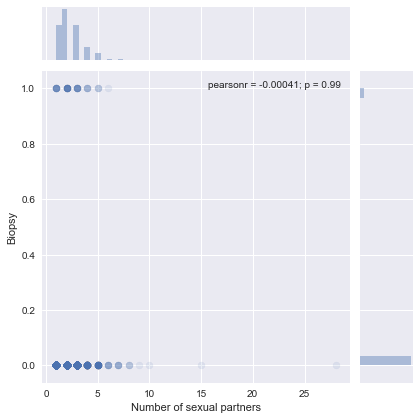

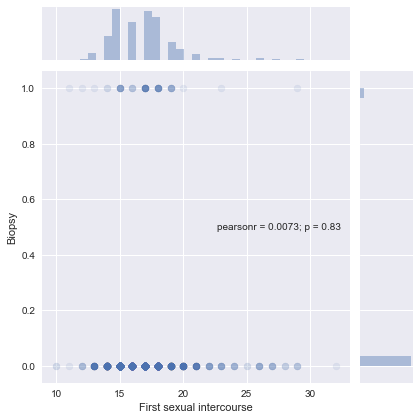

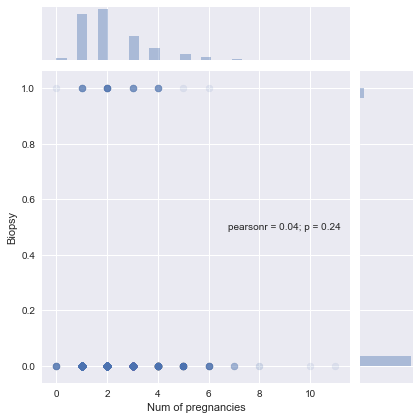

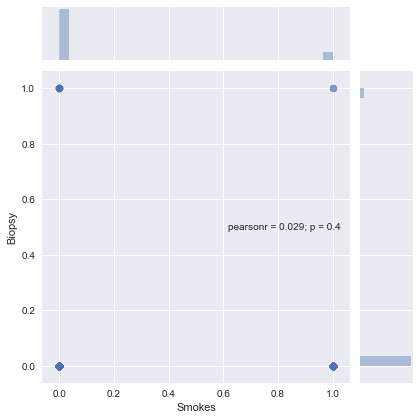

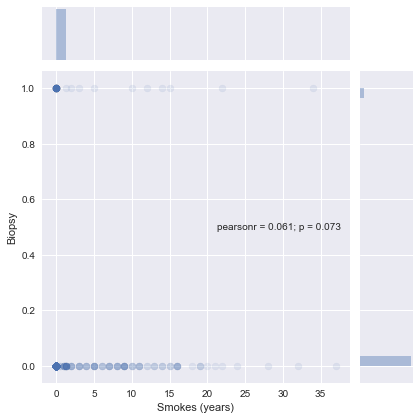

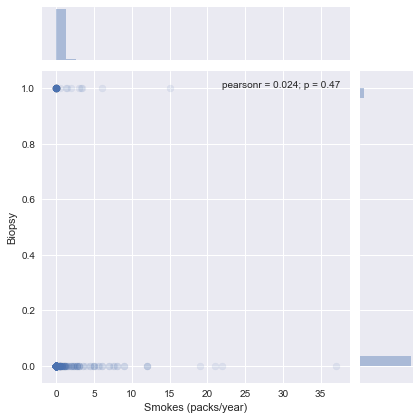

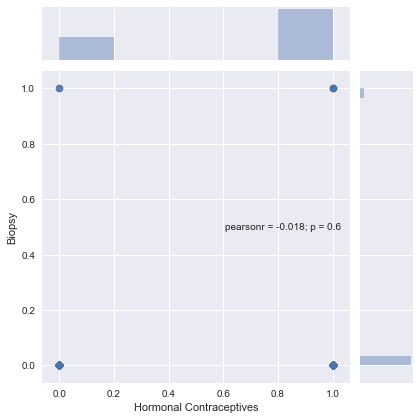

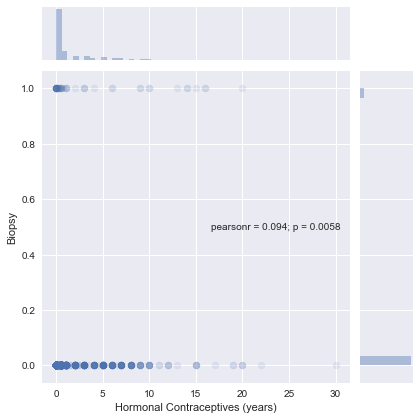

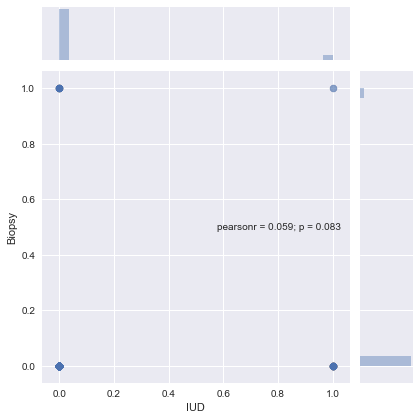

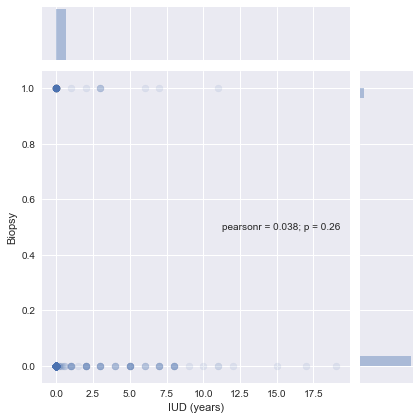

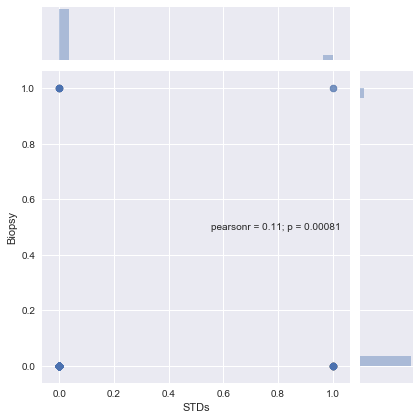

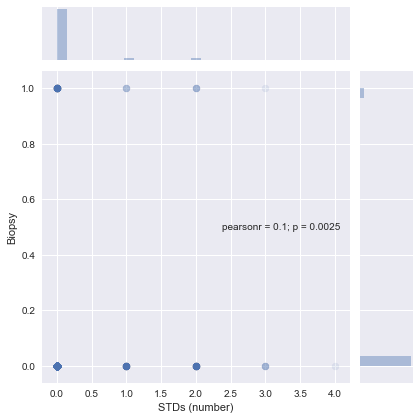

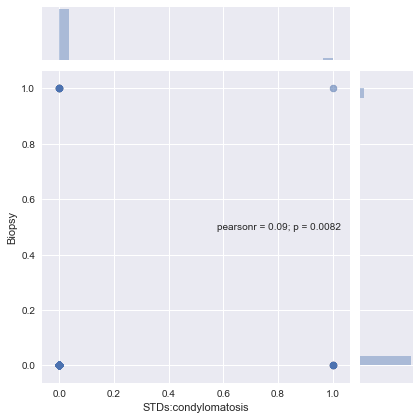

C:\Users\wibot\Anaconda3\lib\site-packages\scipy\stats\stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\wibot\Anaconda3\lib\site-packages\scipy\stats\stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


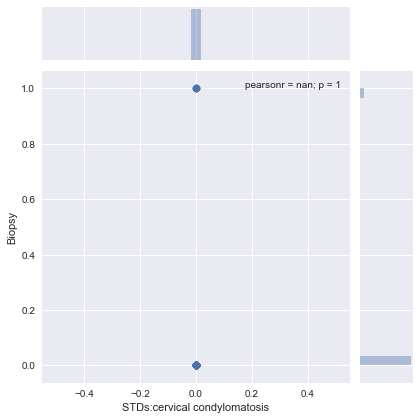

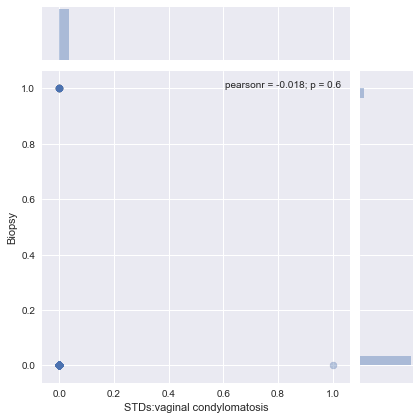

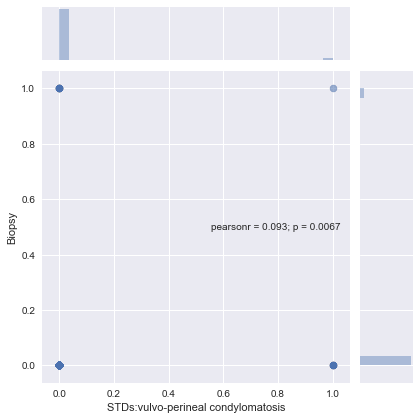

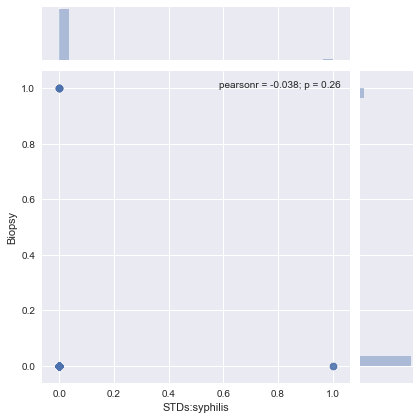

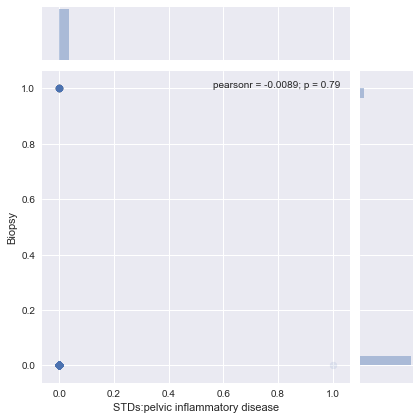

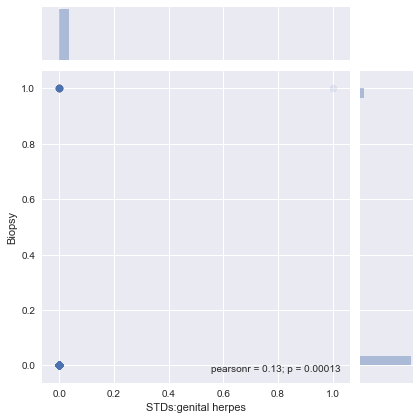

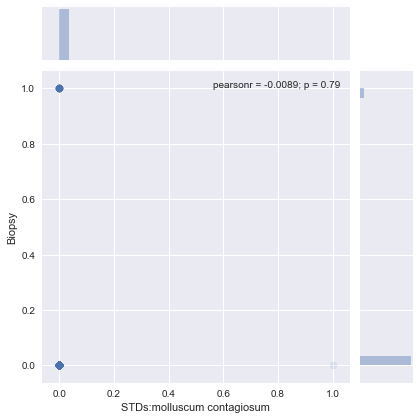

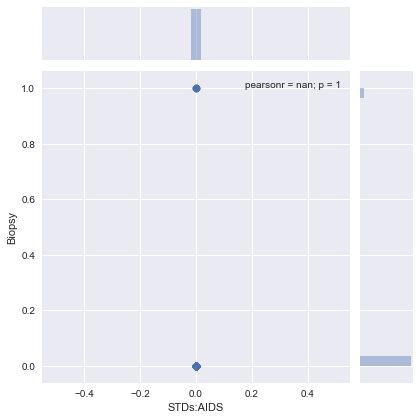

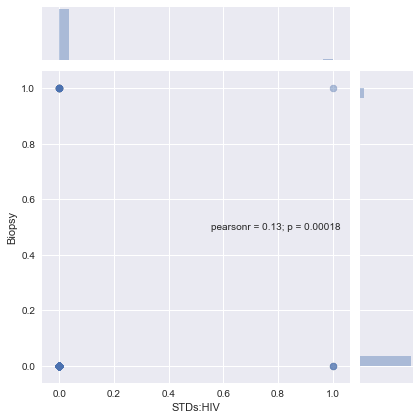

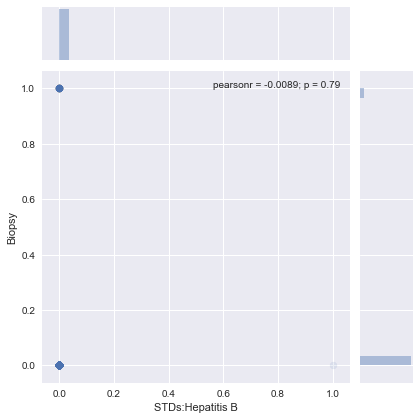

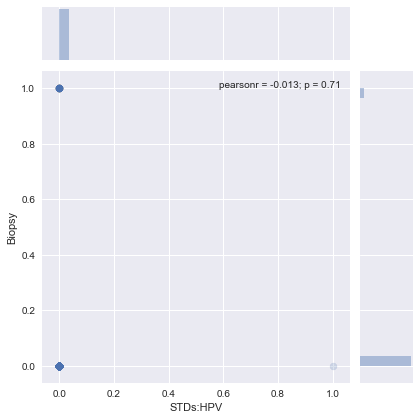

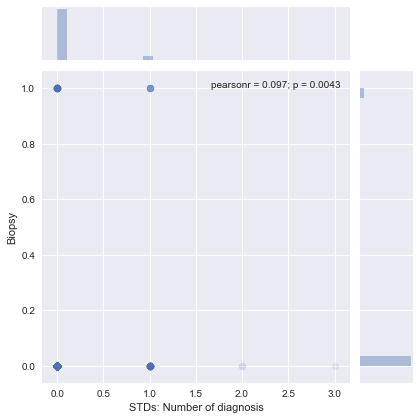

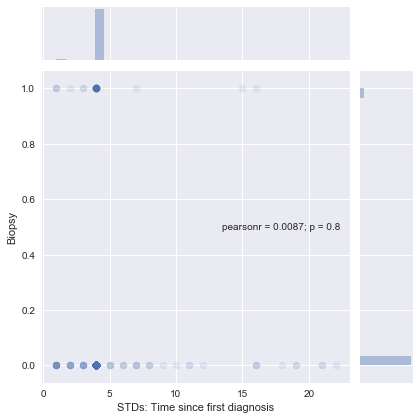

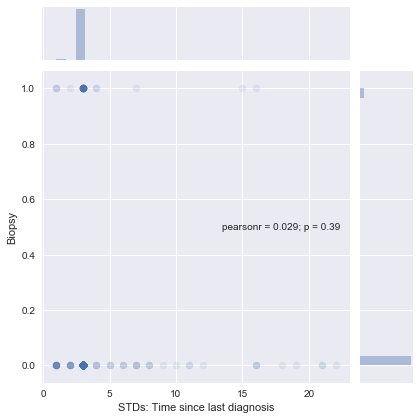

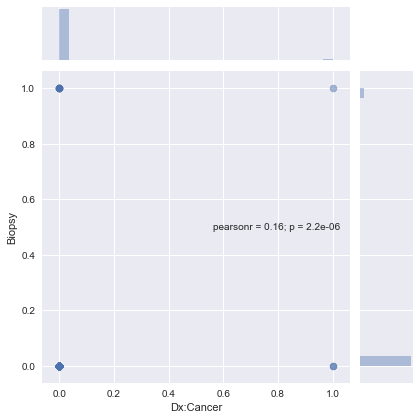

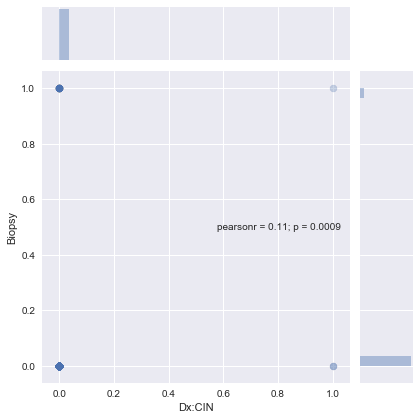

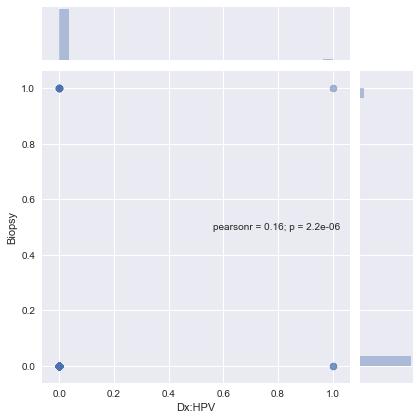

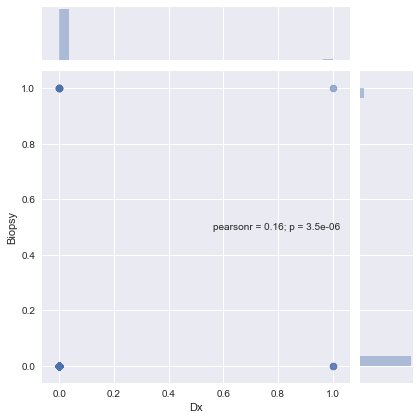

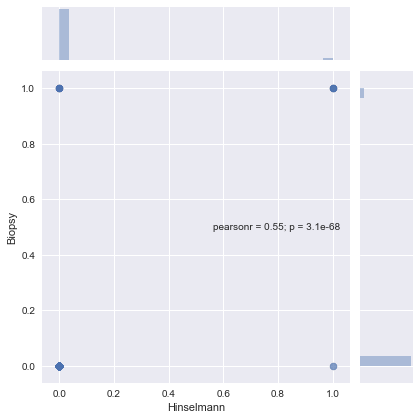

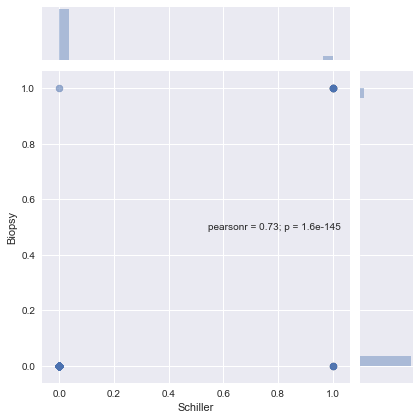

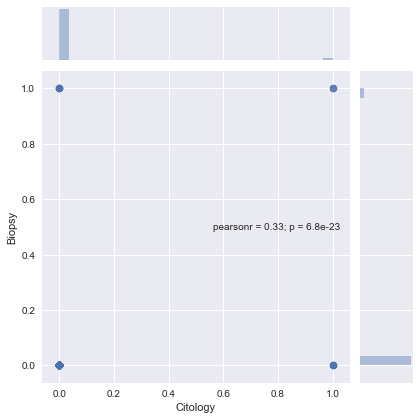

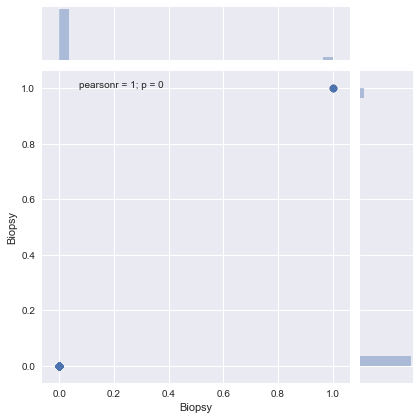

In [30]:
import seaborn as sns
sns.set()
for col in df1.columns[1:]:
    sns.jointplot(x=col, y='Biopsy', data=df1, alpha=0.1)
    plt.show()

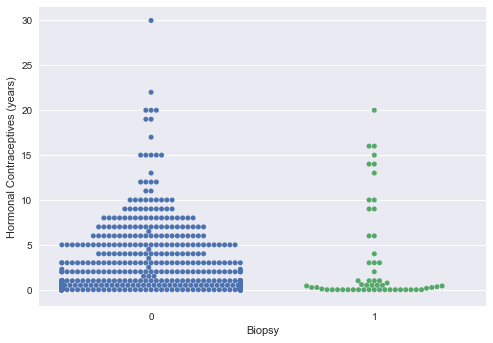

In [19]:
sns.set()
_ = sns.swarmplot(x = 'Biopsy', y = 'Hormonal Contraceptives (years)', data = df1)
_ = plt.xlabel('Biopsy')
_ = plt.ylabel('Hormonal Contraceptives (years)')
plt.show()

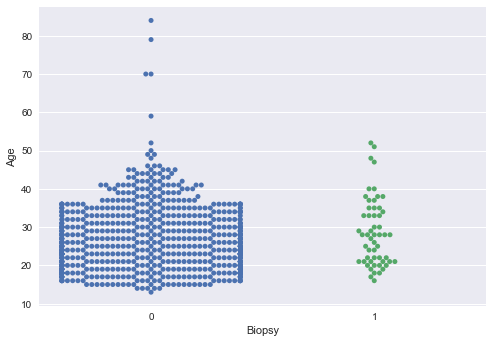

In [40]:
sns.set()
_ = sns.swarmplot(x = 'Biopsy', y = 'Age', data = df1)
_ = plt.xlabel('Biopsy')
_ = plt.ylabel('Age')
plt.show()

ECDF for age of patients with positive biopsy results.

In [21]:
k=df1.loc[(df1['Biopsy'] == 1)]['Age']

In [34]:
k

6      51
22     40
23     40
41     37
44     37
64     38
93     33
96     35
103    38
131    30
163    28
185    28
203    28
205    25
214    30
216    29
224    24
257    22
264    22
314    21
320    22
325    20
335    29
345    22
370    21
377    20
383    19
421    26
434    20
472    35
496    27
530    21
539    18
549    34
578    19
598    17
610    21
614    24
653    21
655    21
664    38
670    47
671    52
673    48
686    35
687    33
688    28
693    18
739    28
753    20
754    28
781    33
786    25
797    33
814    16
Name: Age, dtype: int64

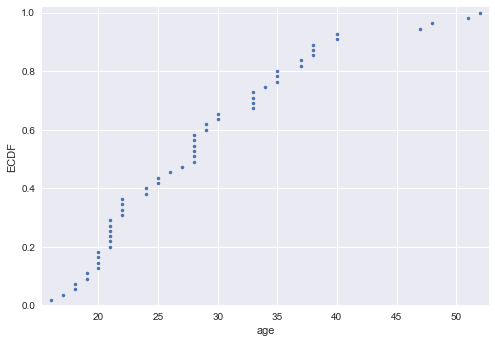

In [38]:
import numpy as np
def ecdf(data):
    n=len(data)
    x= np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y
x,y = ecdf(k)
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Make the margins nice
_=plt.margins(0.02)

# Label the axes
_ = plt.xlabel('age')
_ = plt.ylabel('ECDF') 

# Display the plot
plt.show()

Some boxplot visualizations

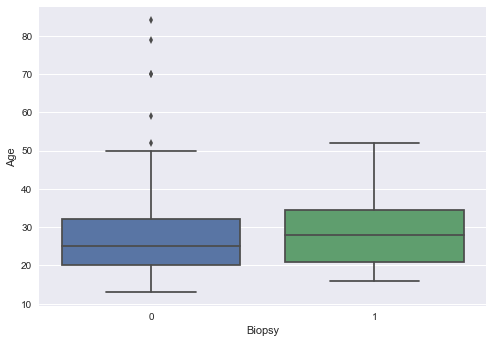

In [24]:
sns.set()
_ = sns.boxplot(x = 'Biopsy', y = 'Age', data = df1)
_ = plt.xlabel('Biopsy')
_ = plt.ylabel('Age')
plt.show()

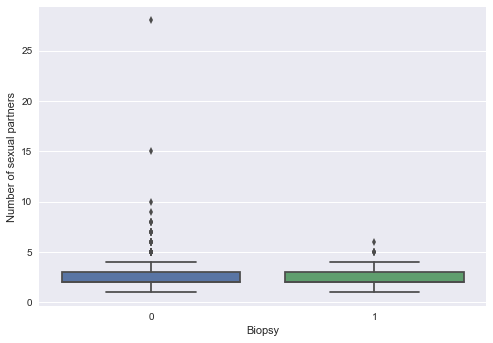

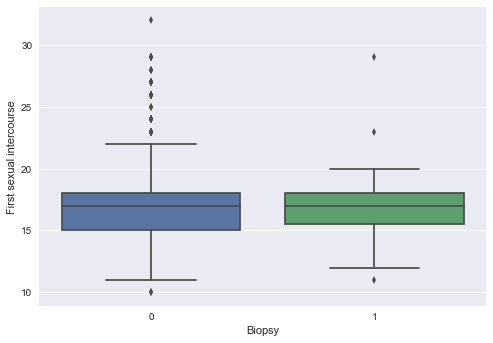

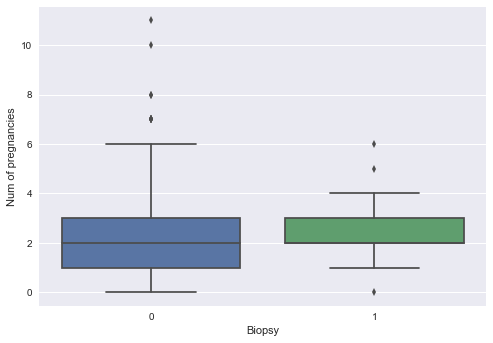

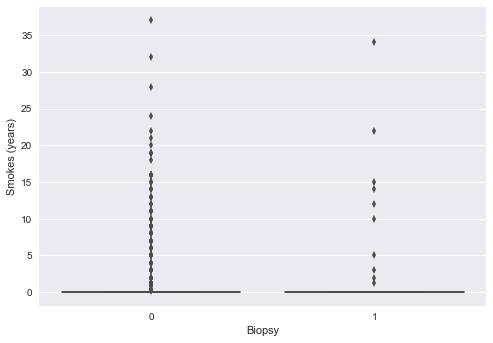

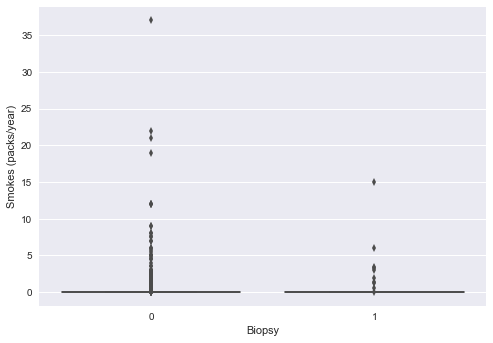

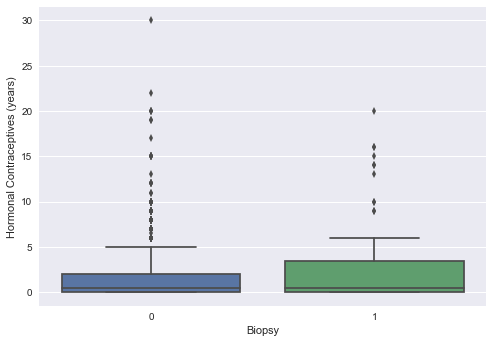

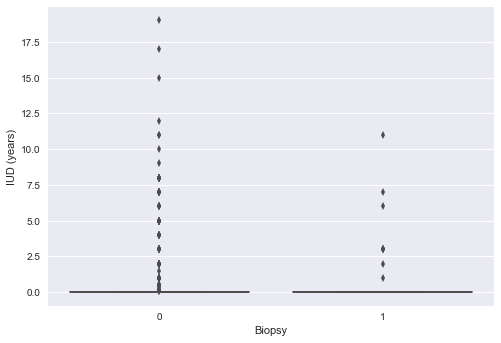

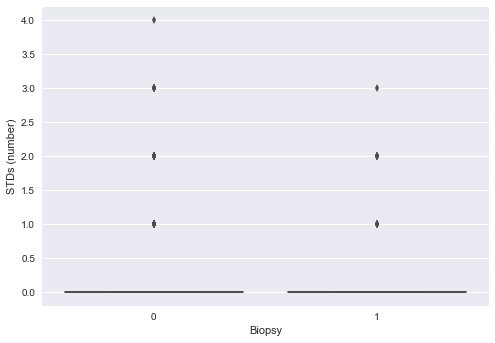

In [39]:
for col in continuous:
    sns.set()
    _ = sns.boxplot(x = 'Biopsy', y = col, data = df1)
    _ = plt.xlabel('Biopsy')
    _ = plt.ylabel(col)
    plt.show()

Correlation coefficients.

In [29]:
for col in df1.columns[1:]:
    corr_mat = np.corrcoef(df1[col], df1['Biopsy'])
    r = corr_mat[0,1]
    print(col,r)

Age 0.0559555150933
Number of sexual partners -0.000408234754557
First sexual intercourse 0.00725872565569
Num of pregnancies 0.0402150718541
Smokes 0.0287237598267
Smokes (years) 0.061204228938
Smokes (packs/year) 0.0244868672994
Hormonal Contraceptives -0.0180152522513
Hormonal Contraceptives (years) 0.0941636402581
IUD 0.0592305229491
IUD (years) 0.0381761371374
STDs 0.114148066189
STDs (number) 0.103152718358
STDs:condylomatosis 0.0901638872299
STDs:cervical condylomatosis nan
STDs:vaginal condylomatosis -0.0179111979006
STDs:vulvo-perineal condylomatosis 0.092548317834
STDs:syphilis -0.0383107083179
STDs:pelvic inflammatory disease -0.00893991029775
STDs:genital herpes 0.130522690347
STDs:molluscum contagiosum -0.00893991029775
STDs:AIDS nan
STDs:HIV 0.12770236106
STDs:Hepatitis B -0.00893991029775
STDs:HPV -0.0126503251302
STDs: Number of diagnosis 0.0974489208789
STDs: Time since first diagnosis 0.00868514442778
STDs: Time since last diagnosis 0.0292631299924
Dx:Cancer 0.1609049

C:\Users\wibot\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\wibot\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Results:
'Schiller', 'Hinselmann' and 'Cytology' have the highest correlation with biopsy(+)then in descending order come 'STDs:genital herpes', 'STDs:HIV', 'STDs (number)', 'Hormonal Contraceptives (years)'. Age of most paitients with biopsy(+) varies from 18 to 40.